# Moving Average Trading Strategy Notebook

This notebook is replication of the notebook(https://github.com/aldodec/Moving-Average-Trading-Strategy-with-Python) and I have made improvements as part of learning process.

Some of the packages original poster used has been updated and changed. I have used the latest versions and made improves and anyone should be able to run them and replicate my results.

The purpose of this script is to implement a very simple trading strategy with Python. This strategy is based on the difference between slow and fast moving averages on the adjusted closed prices of shares. First we describe the strategy in detail explaining various features and then we optimize it using Python libraries.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import yfinance as yf
sns.set()
import warnings
warnings.filterwarnings('ignore')
from itertools import product

Here we need to note the original poster used pdr.get_data_yahoo which has been deprecated.  What I did is to use the newer version of yfinance and the download function.

In [2]:
stock =['^GSPC']
start = pd.to_datetime('2010-01-01')
end = pd.to_datetime('2018-06-29')
data = yf.download(stock, start=start, end=end)
data['Log Returns'] = np.log(data['Close']/data['Close'].shift(1))
data.dropna(inplace=True)
data.head(5)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Log Returns
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,
Date,,,,,,
2010-01-05,1136.520020,1136.630005,1129.660034,1132.660034,2491020000,0.003111
2010-01-06,1137.140015,1139.189941,1133.949951,1135.709961,4972660000,0.000545
2010-01-07,1141.689941,1142.459961,1131.319946,1136.270020,5270680000,0.003993
2010-01-08,1144.979980,1145.390015,1136.219971,1140.520020,4389590000,0.002878
2010-01-11,1146.979980,1149.739990,1142.020020,1145.959961,4255780000,0.001745


Now we can plot the stock price between 2010 and 2018

<Figure size 1200x800 with 0 Axes>

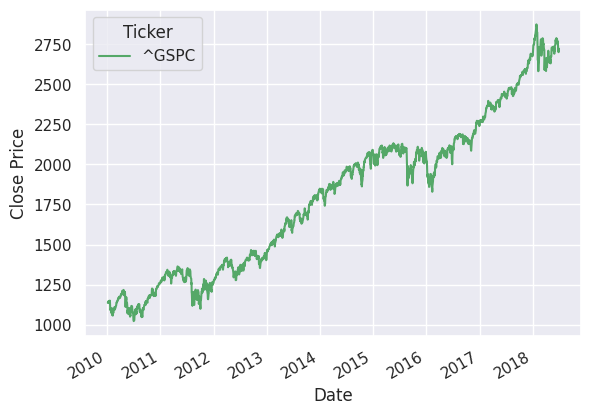

In [7]:
plt.figure(figsize = (6,4), dpi=200)
data['Close'].plot(c = 'g')
plt.ylabel('Close Price')
plt.show()

And here we plot the cumulative log returns $c_t$ and the total relative returns $c^{\text{rel}}_t, given by:

$$c_t = \sum^t_{k=0}\ln (p_k/p_{k-1}),$$

and

$$c^{\text{rel}}_t=\exp(c_t)-1$$

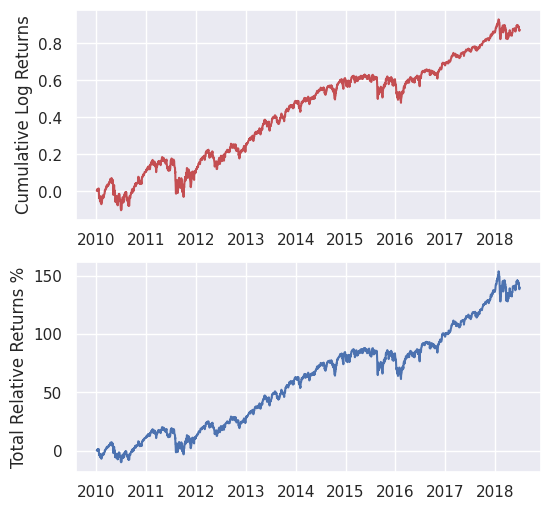

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,6))

ax1.plot(data['Log Returns'].cumsum(), c = 'r')
ax1.set_ylabel('Cumulative Log Returns')

ax2.plot(100*(np.exp(data['Log Returns'].cumsum())-1))
ax2.set_ylabel('Total Relative Returns %')

plt.show()

Now we compute a fast moving average of 40 days (MA40) and a slow moving average of 252 days (MA252) on the close price

In [10]:
MAF = 42
MAS =252

data['MASlow'] = data['Close'].rolling(MAS).mean()
data['MAFast'] = data['Close'].rolling(MAF).mean()
data.dropna(inplace=True)
data.head()

Price,Close,High,Low,Open,Volume,Log Returns,MASlow,MAFast
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,,
Date,,,,,,,,
2011-01-03,1271.869995,1276.170044,1257.619995,1257.619995,4286670000,0.011251,1140.516624,1223.431899
2011-01-04,1270.199951,1274.119995,1262.660034,1272.949951,4796420000,-0.001314,1141.047100,1225.151899
2011-01-05,1276.560059,1277.630005,1265.359985,1268.780029,4764920000,0.004995,1141.600354,1226.473328
2011-01-06,1273.849976,1278.170044,1270.430054,1276.290039,4844100000,-0.002125,1142.124798,1227.616185
2011-01-07,1271.500000,1276.829956,1261.699951,1274.410034,4963110000,-0.001846,1142.626862,1228.764994


Now we compose the closing price with our moving averages

<Figure size 1500x900 with 0 Axes>

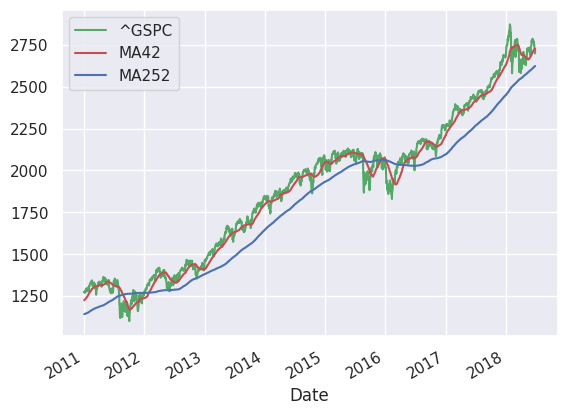

In [11]:
plt.figure(figsize= (15,9))
data['Close'].plot(color = 'g', label = 'Close Price')
data['MAFast'].plot(color = 'r', label = 'MA{}'.format(MAF) )
data['MASlow'].plot(color = 'b', label = 'MA{}'.format(MAS) )
plt.legend()
plt.show()

We see that the fast moving averages follows closer to the daily closing price and the slow moving averages follows less close to the daily closing price and is "delayed" in the sense that it has the same trend as the fast averages but is shifted to the right in time

We also observe at any given time, the fast and slow moving averages have a price difference. Most of the times the fast moving average is higher than the slow moving average for the time window we are observing.

Based on this, we can develop a trading strategy: if MA40 > MA252, we then long one share of the stock; otherwise, we do nothing.

Now we can define our signal(when we should excute a trade):

In [12]:
data['Signal'] = np.where(data['MAFast']>data['MASlow'], 1, -1)
data.dropna(inplace=True)
data.head()

Price,Close,High,Low,Open,Volume,Log Returns,MASlow,MAFast,Signal
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,,,
Date,,,,,,,,,
2011-01-03,1271.869995,1276.170044,1257.619995,1257.619995,4286670000,0.011251,1140.516624,1223.431899,1
2011-01-04,1270.199951,1274.119995,1262.660034,1272.949951,4796420000,-0.001314,1141.047100,1225.151899,1
2011-01-05,1276.560059,1277.630005,1265.359985,1268.780029,4764920000,0.004995,1141.600354,1226.473328,1
2011-01-06,1273.849976,1278.170044,1270.430054,1276.290039,4844100000,-0.002125,1142.124798,1227.616185,1
2011-01-07,1271.500000,1276.829956,1261.699951,1274.410034,4963110000,-0.001846,1142.626862,1228.764994,1


As we have observed in the plot above, for most of the trading days, we have a signal for trade(for most days MA40 > MA252)

Signal
 1    1642
-1     243
Name: count, dtype: int64


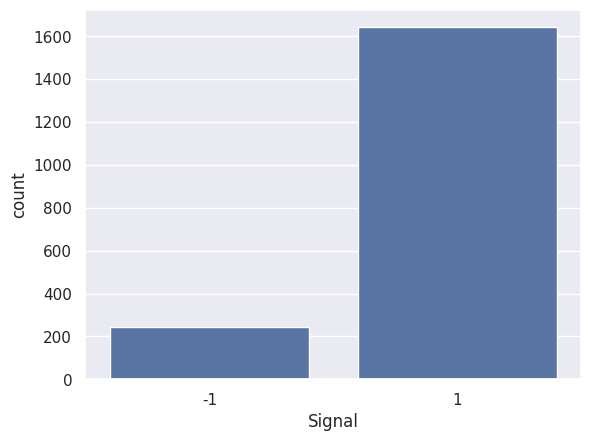

In [16]:
#plt.hist(data['Signal'])
sns.countplot(x=data['Signal'])
print(data['Signal'].value_counts())

In [24]:
stock[0]

'^GSPC'

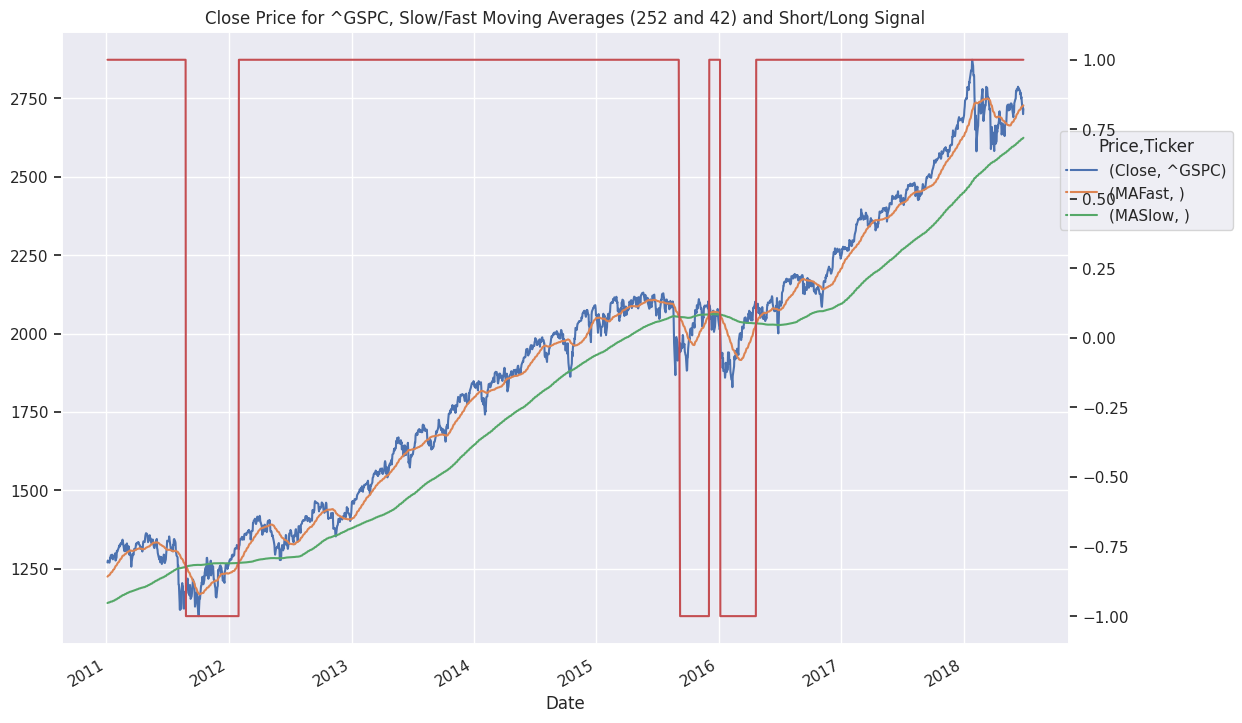

In [49]:
Ax = data[['Close','MAFast','MASlow']].plot(figsize=(13,9),title='Close Price for {}, Slow/Fast Moving Averages ({} and {}) and Short/Long Signal'.format(stock[0],MAS,MAF))
#Ax.title('Hello')
ax = data['Signal'].plot(secondary_y=True)
Ax.get_legend().set_bbox_to_anchor((1.17, 0.85))


Following this strategy, the daily returns $R^S_t$ would be given by the product of the log return $R_T$ times our signal $O_t$, like so:

$$R^S_t=O_tR_t$$

In [41]:
data['Strategy Log Returns'] = data['Log Returns'] * data['Signal'].shift(1)
data.dropna(inplace=True)

(We note that we have shifted the signal for one day, since we implement the strategy on the day after the closing.)

The results of the strategy are not encouraging. We compare it to a 'Buy and Hold' strategy:

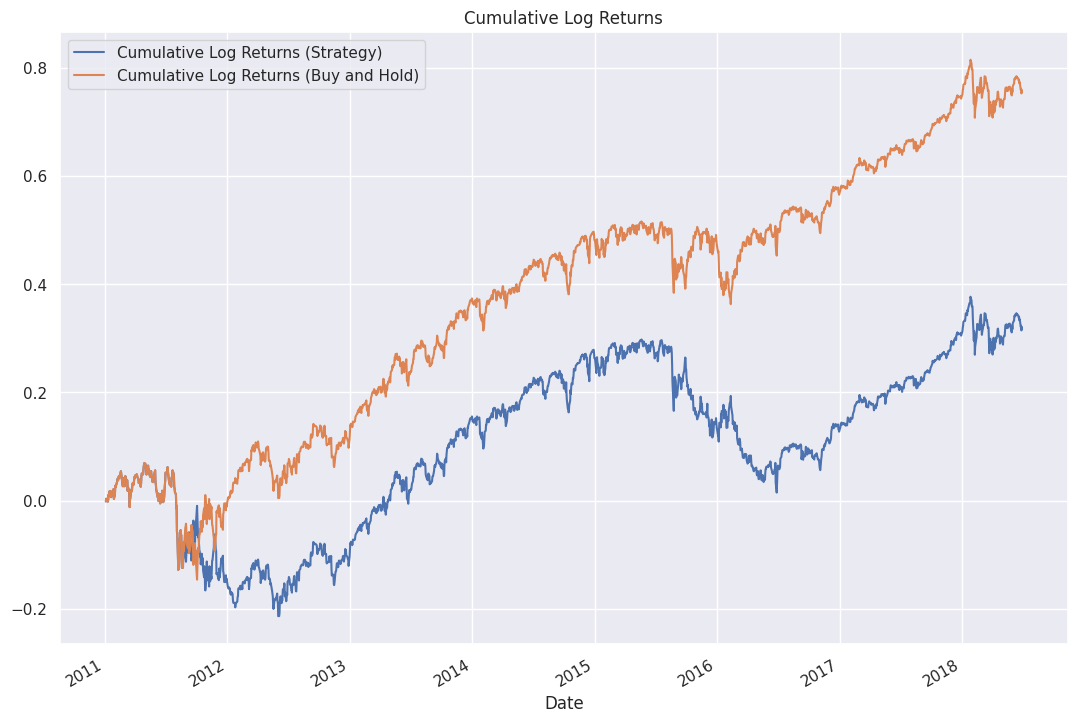

In [44]:
plt.figure(figsize = (13,9))
data['Strategy Log Returns'].cumsum().plot(label = 'Cumulative Log Returns (Strategy)')
data['Log Returns'].cumsum().plot(label = 'Cumulative Log Returns (Buy and Hold)')
plt.title('Cumulative Log Returns')
plt.legend()
plt.show()

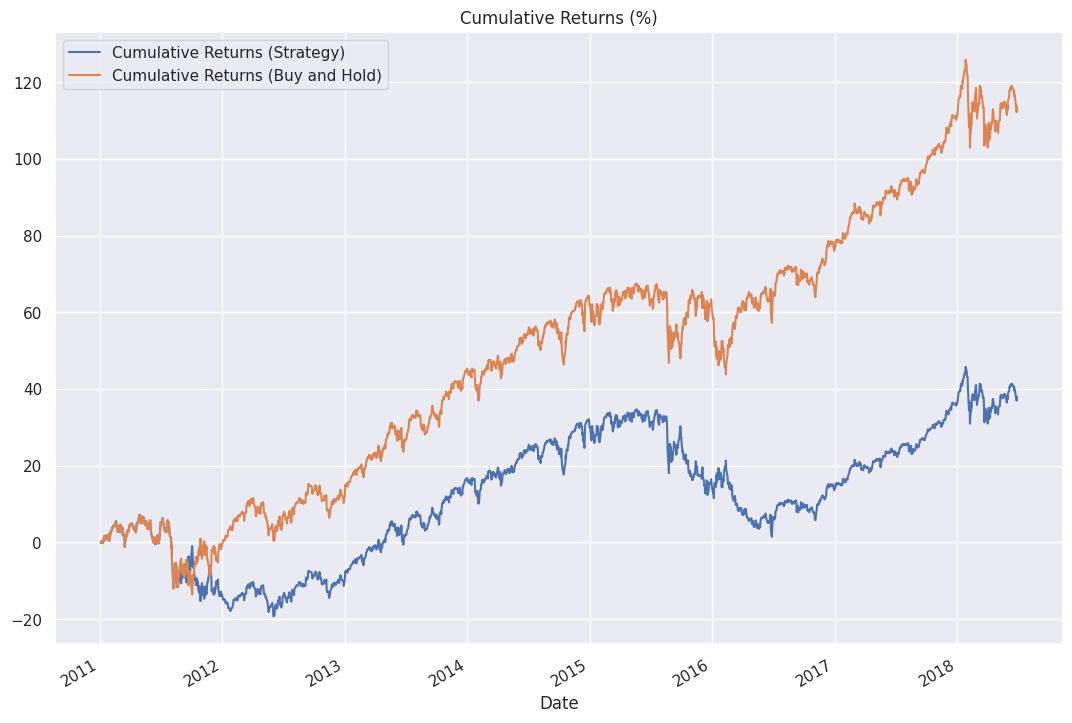

In [46]:
plt.figure(figsize = (13,9))
(100*(np.exp(data['Strategy Log Returns'].cumsum())-1)).plot(label = 'Cumulative Returns (Strategy)')
(100*(np.exp(data['Log Returns'].cumsum())-1)).plot(label = 'Cumulative Returns (Buy and Hold)')
plt.title('Cumulative Returns (%)')
plt.legend()
plt.show()

So, for this share the strategy underperforms and it is better to stick to Buy and Hold.

To evaluate the strategy better, we compute the total returns for the strategy and the market cases, as well as the annualized volatility:

In [50]:
print('Total Returns')
print(25*'===')
print('Market Total Return:',((np.exp(data[['Log Returns', 'Strategy Log Returns']].sum()) -1)*100).round(3).iloc[0],'%')
print('Strategy Total Return:',((np.exp(data[['Log Returns', 'Strategy Log Returns']].sum()) -1)*100).round(3).iloc[1],'%')

Total Returns
Market Total Return: 113.568 %
Strategy Total Return: 37.832 %


In [51]:
print('Annualized Volatility')
print(25*'===')
print('Market Volatility:',(data[['Log Returns', 'Strategy Log Returns']].std()*252**0.5).round(5).iloc[0],'%')
print('Strategy Volatility:',(data[['Log Returns', 'Strategy Log Returns']].std()*252**0.5).round(5).iloc[1],'%')

Annualized Volatility
Market Volatility: 0.14383 %
Strategy Volatility: 0.14394 %


Now that we have finished the preliminaries, we write a general script to analyse a given stock with the strategies.  Given the stock, the start and ending dates and our fast and slow moving averages, we will obtain: a. a plot showing the adj. close price, the MAs and the strategy signal, b. a plot comparing the market and strategy relative cumulative returns, and c. information about the market and strategy total returns and annualized volatility.

In [52]:
def MA_Strategy(stock,start,end,MAF,MAS):
    data = yf.download(stock, start=start, end=end)
    data['Log Returns'] = np.log(data['Close']/data['Close'].shift(1))
    data.dropna(inplace=True)
    data['MASlow'] = data['Close'].rolling(MAS).mean()
    data['MAFast'] = data['Close'].rolling(MAF).mean()
    data.dropna(inplace=True)
    data['Signal'] = np.where(data['MAFast']>data['MASlow'],1,-1)
    data.dropna(inplace=True)
    data['Strategy Log Returns'] = data['Log Returns'] * data['Signal'].shift(1)
    data.dropna(inplace=True)

    data[['Close','MAFast','MASlow']].plot(figsize=(13,9),title='Close Price for {}, Slow/Fast Moving Averages ({} and {}) and Short/Long Signal'.format(stock[0],MAS,MAF)).get_legend().set_bbox_to_anchor((1.17, 0.85))
    data['Signal'].plot(secondary_y=True)

    plt.figure(figsize = (15,9))
    (100*(np.exp(data['Strategy Log Returns'].cumsum())-1)).plot(label = 'Cumulative Returns (Strategy)')
    (100*(np.exp(data['Log Returns'].cumsum())-1)).plot(label = 'Cumulative Returns (Buy and Hold)')
    plt.title('Cumulative Returns (%): {}'.format(stock[0]))
    plt.legend()
    plt.show()

    print('\n')
    print('Total Returns:', stock[0])
    print(35*'===')
    print('Market Total Return:',((np.exp(data[['Log Returns', 'Strategy Log Returns']].sum()) -1)*100).round(3).iloc[0],'%')
    print('Strategy Total Return:',((np.exp(data[['Log Returns', 'Strategy Log Returns']].sum()) -1)*100).round(3).iloc[1],'%')
    print('\n')
    print('Annualized Volatility:', stock[0])
    print(35*'===')
    print('Market Volatility:',(data[['Log Returns', 'Strategy Log Returns']].std()*252**0.5).round(5).iloc[0],'%')
    print('Strategy Volatility:',(data[['Log Returns', 'Strategy Log Returns']].std()*252**0.5).round(5).iloc[1],'%')


Now we reproduce the above result to make sure our script is working properly

[*********************100%***********************]  1 of 1 completed


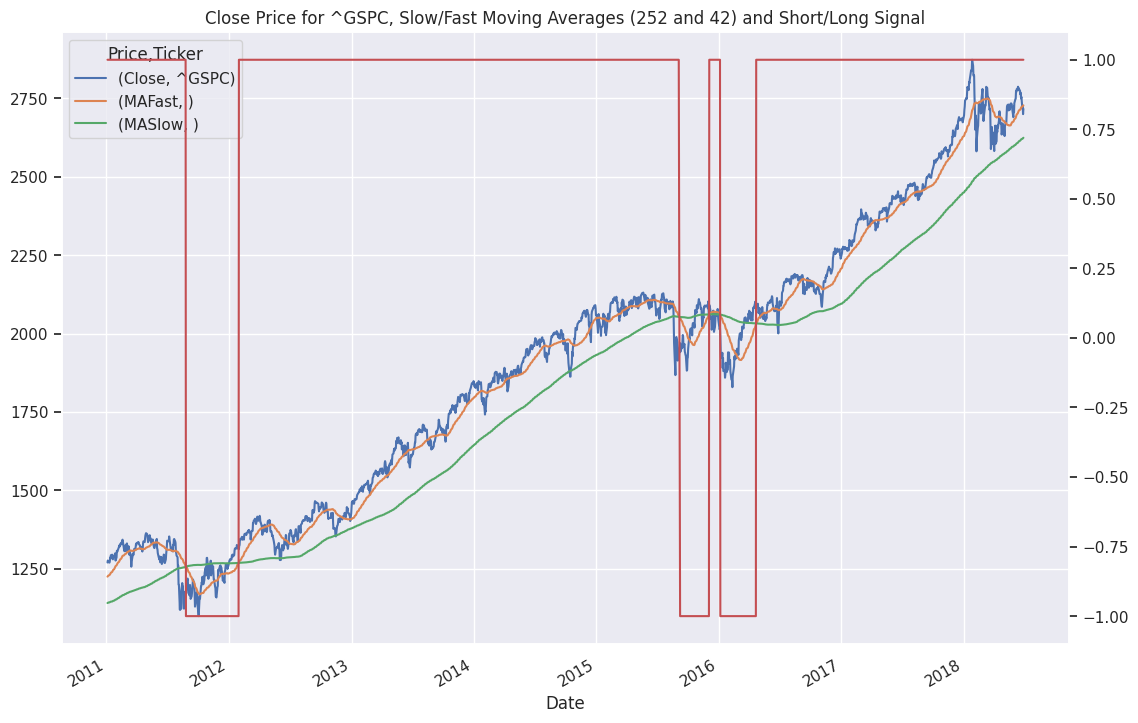

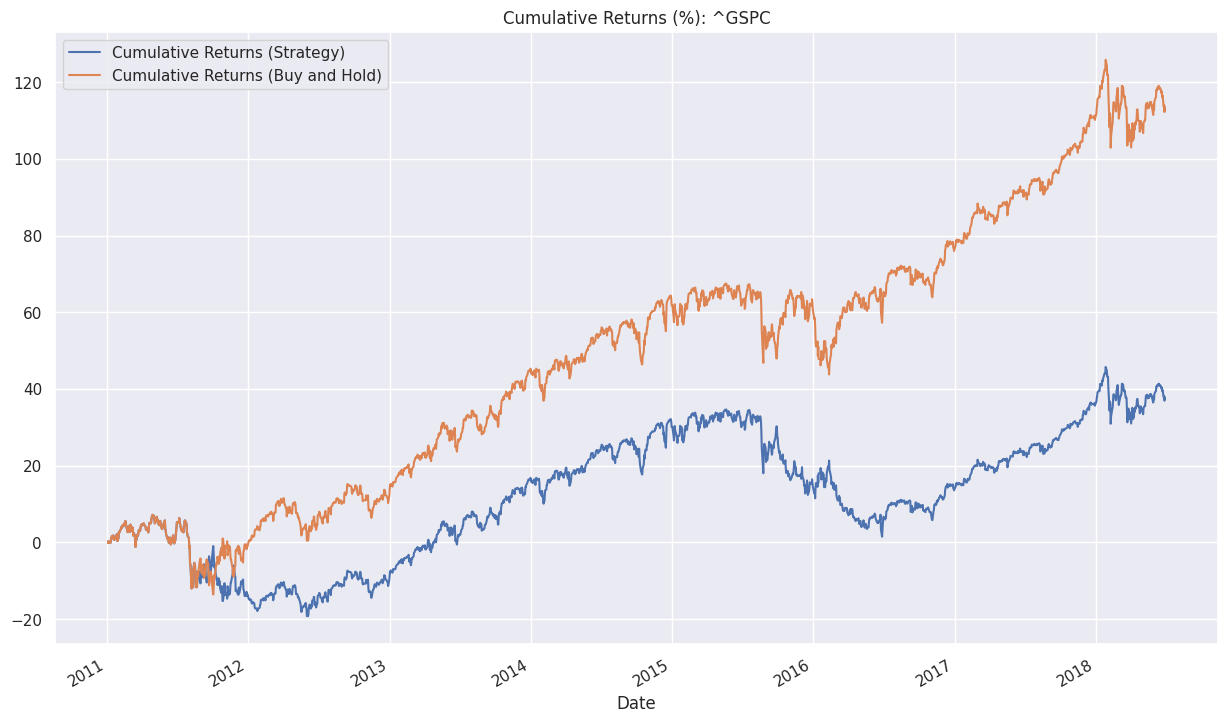



Total Returns: ^GSPC
Market Total Return: 113.568 %
Strategy Total Return: 37.832 %


Annualized Volatility: ^GSPC
Market Volatility: 0.14383 %
Strategy Volatility: 0.14394 %


In [53]:
stock =['^GSPC']
start = pd.to_datetime('2010-01-01')
end = pd.to_datetime('2018-06-29')
MAF = 42
MAS =252

MA_Strategy(stock,start,end,MAF,MAS)

Now we test our strategy with AAPL:

[*********************100%***********************]  1 of 1 completed


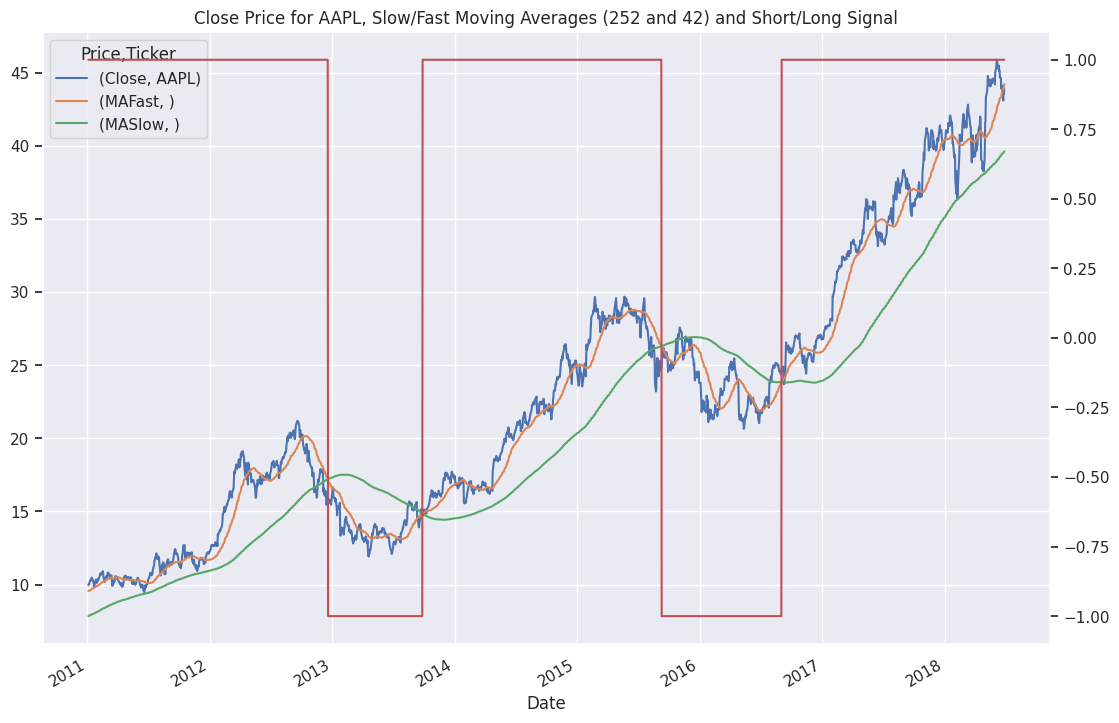

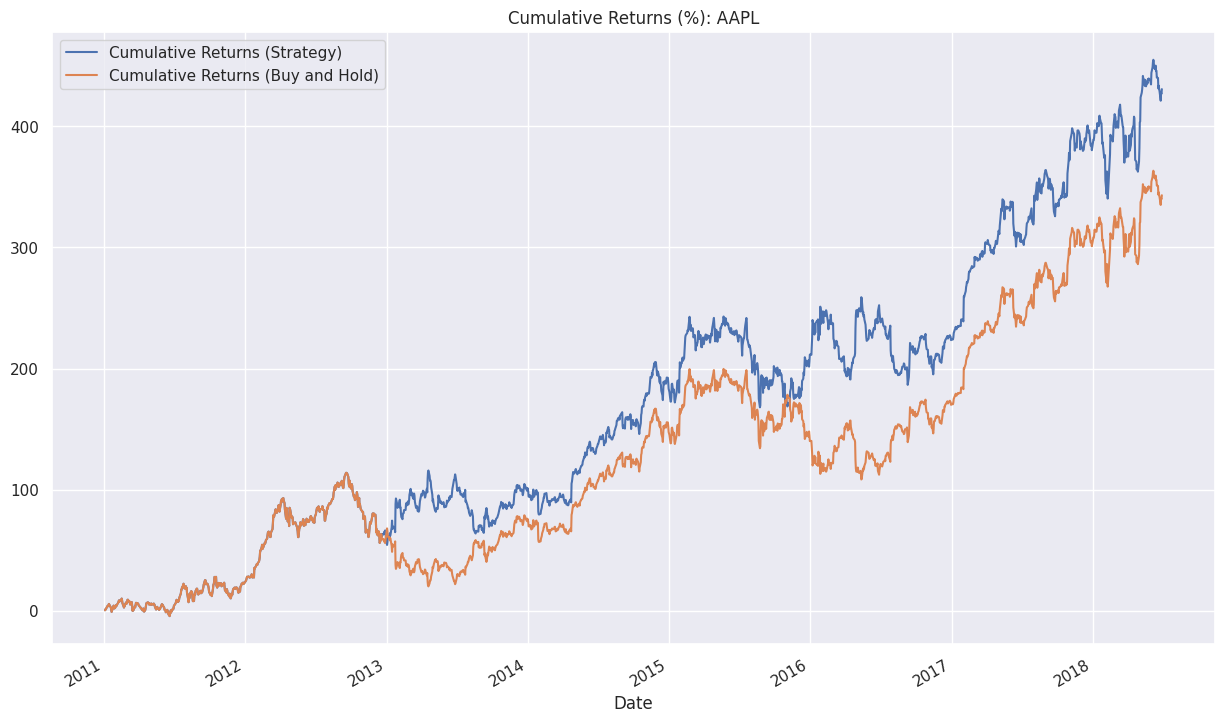



Total Returns: AAPL
Market Total Return: 343.012 %
Strategy Total Return: 430.586 %


Annualized Volatility: AAPL
Market Volatility: 0.25037 %
Strategy Volatility: 0.25029 %


In [54]:
stock =['AAPL']
start = pd.to_datetime('2010-01-01')
end = pd.to_datetime('2018-06-29')
MAF = 42
MAS =252

MA_Strategy(stock,start,end,MAF,MAS)


Interestingly, our moving average trading strategy outperform the buy-and-hold strategy for AAPL.  

Now we try GE and see if for stocks other than AAPL our strategy performs better than market return

[*********************100%***********************]  1 of 1 completed


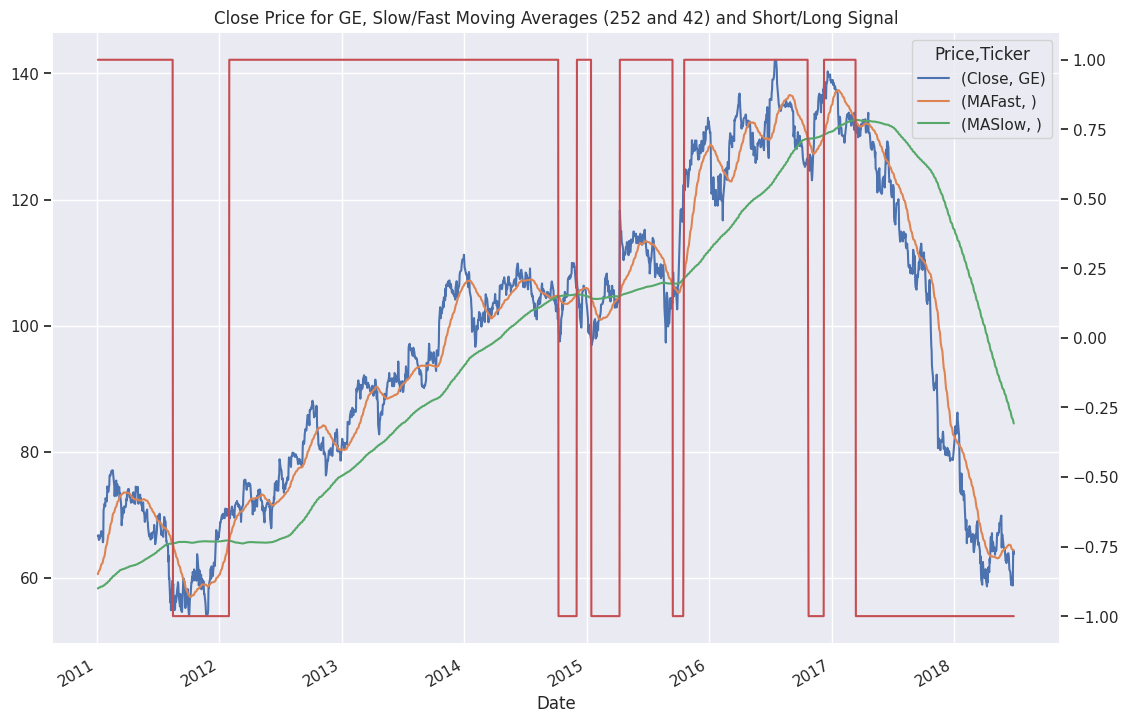

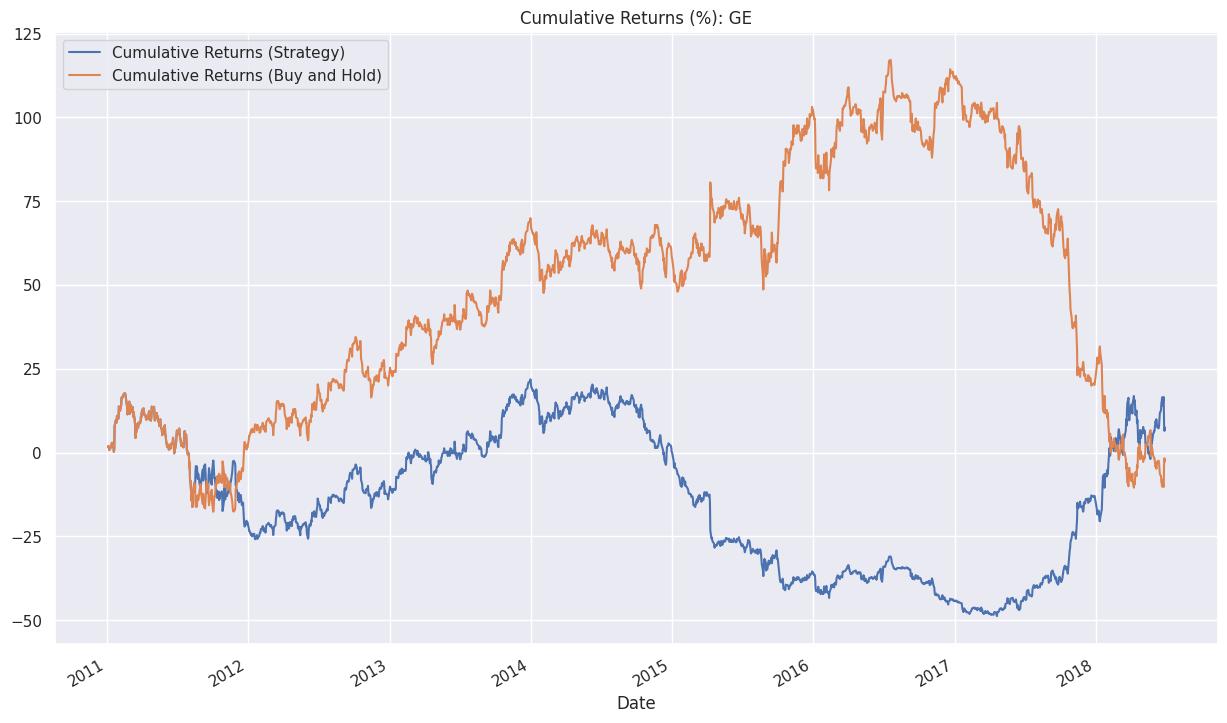



Total Returns: GE
Market Total Return: -2.6 %
Strategy Total Return: 7.499 %


Annualized Volatility: GE
Market Volatility: 0.21902 %
Strategy Volatility: 0.21902 %


In [55]:
stock =['GE']
start = pd.to_datetime('2010-01-01')
end = pd.to_datetime('2018-06-29')
MAF = 42
MAS =252

MA_Strategy(stock,start,end,MAF,MAS)


Here we observe interesting behaviour: for significant amount of time, the buy-and-hold strategy massively outperform our moving average strategy.  However, by the end of our time window, the moving average strategy catches up and outperform the buy-and-hold strategy.

Now we try another stock (UNH):

[*********************100%***********************]  1 of 1 completed


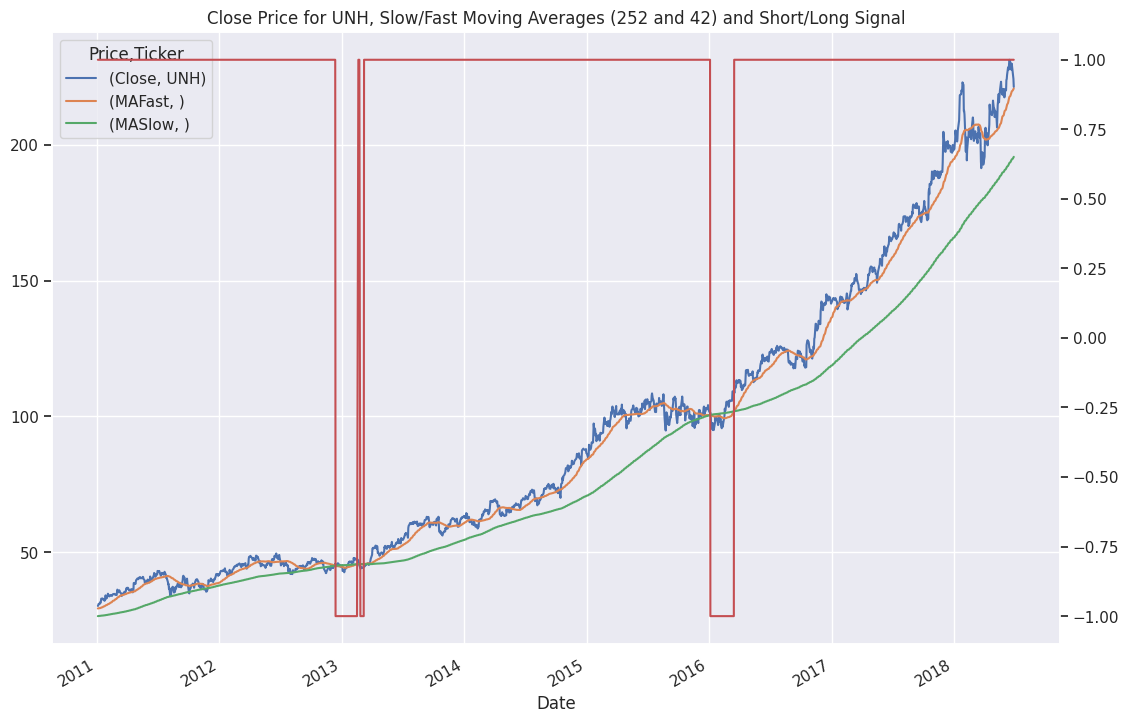

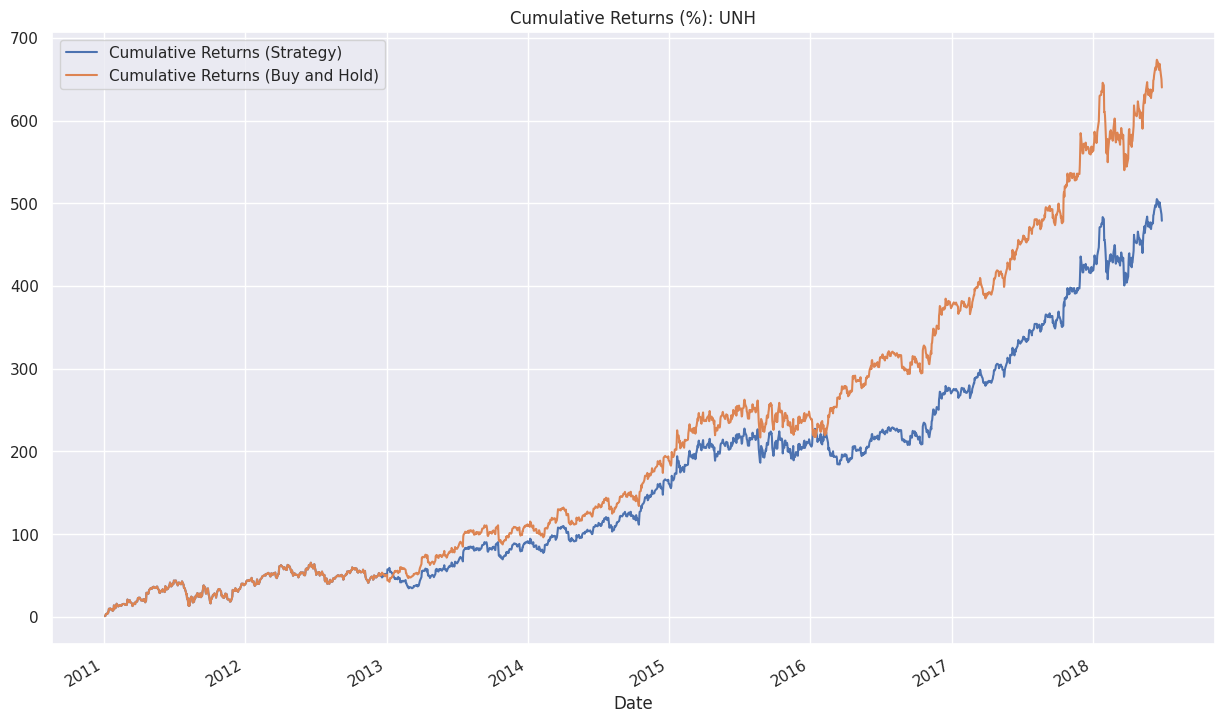



Total Returns: UNH
Market Total Return: 640.012 %
Strategy Total Return: 478.873 %


Annualized Volatility: UNH
Market Volatility: 0.22091 %
Strategy Volatility: 0.22105 %


In [60]:
stock =['UNH']
start = pd.to_datetime('2010-01-01')
end = pd.to_datetime('2018-06-29')
MAF = 42
MAS =252

MA_Strategy(stock,start,end,MAF,MAS)


In the case of UNH, the two strategies are similar, with buy-and-hold performing slightly better


Finally, we note for above, we have fixed the fast and slow moving average as 42, 252.  However, we can try to optimise over these two parameters and see if we can extract more profit from the strategy.  Now, we try to optimize the strategy return by choosing different periods for the moving averages. In this case, we will focus on Apple stocks. We will consider a Fast MA interval of (10, 90) and a Slow MA interval of (100, 250). We use the itertools library, which we have allready called at the beggining of the script.

In [78]:
sma1 = range(10, 90, 5)
sma2 = range(100, 250, 10)
stock = ['AAPL']
start = pd.to_datetime('2010-01-01')
end = pd.to_datetime('2018-06-29')

show = pd.DataFrame()

for MAFast, MASlow in product(sma1, sma2):
  data = yf.download(stock, start=start, end=end)
  data.dropna(inplace=True)
  data['Log Returns'] = np.log(data['Close'] / data['Close'].shift(1))
  data.dropna(inplace=True)
  data['MASlow'] = data['Close'].rolling(MASlow).mean()
  data['MAFast'] = data['Close'].rolling(MAFast).mean()
  data.dropna(inplace=True)
  data['Signal'] = np.where(data['MAFast']>data['MASlow'],1,-1)
  data['Strategy Log Returns'] = data['Log Returns'] * (data['Signal'].shift(1))
  data.dropna(inplace=True)

  ret = (np.exp(data[['Log Returns', 'Strategy Log Returns']].sum()) -1)*100
  extension = pd.DataFrame(
      {'MA Slow': MASlow, 'MA Fast': MAFast,
       'Market Return (%)':  ((np.exp(data[['Log Returns', 'Strategy Log Returns']].sum()) -1)*100).iloc[0].round(3),
       'Strategy Return (%)':((np.exp(data[['Log Returns', 'Strategy Log Returns']].sum()) -1)*100).iloc[1].round(3),
       'Difference in Returns (%)': (ret['Strategy Log Returns'] - ret['Log Returns']).round(3)})
  show = pd.concat([show, extension], ignore_index=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [79]:
show.sort_values('Difference in Returns (%)', ascending=False).head(5)

,MA Slow,MA Fast,Market Return (%),Strategy Return (%),Difference in Returns (%)
233,180,85,414.513,681.684,267.171
97,170,40,466.321,672.268,205.947
219,190,80,405.306,590.941,185.635
29,240,15,355.748,539.452,183.705
147,220,55,384.112,561.343,177.231


[*********************100%***********************]  1 of 1 completed


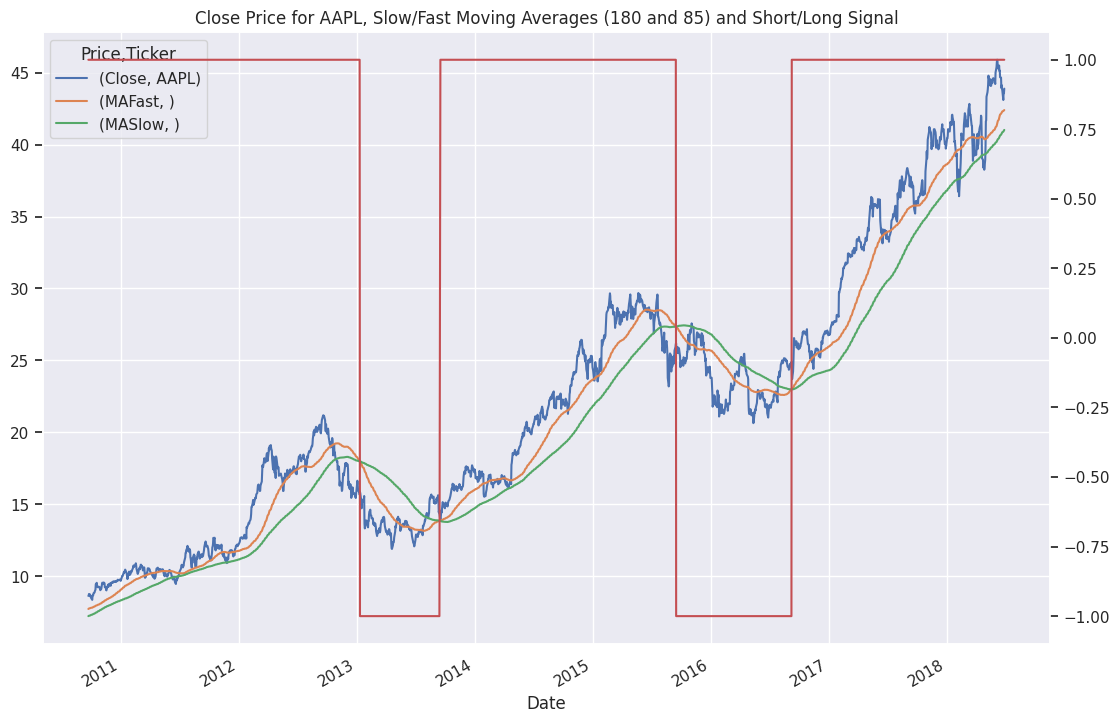

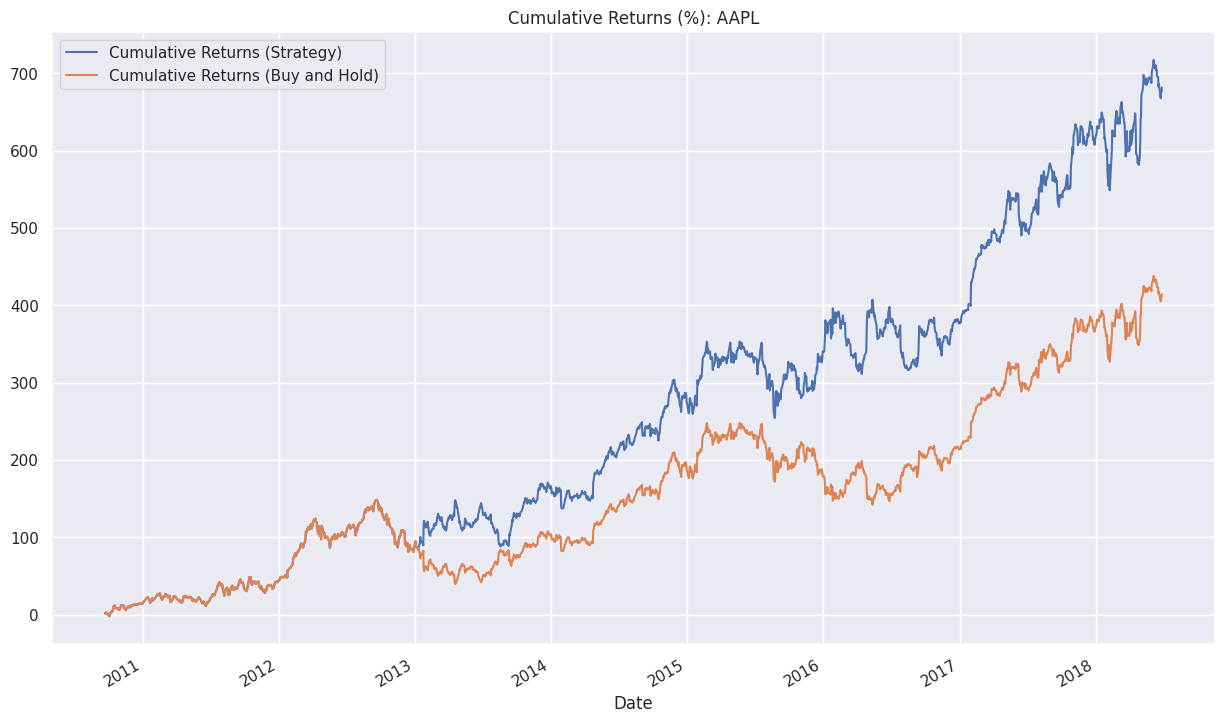



Total Returns: AAPL
Market Total Return: 414.513 %
Strategy Total Return: 681.684 %


Annualized Volatility: AAPL
Market Volatility: 0.24853 %
Strategy Volatility: 0.24832 %


In [68]:
stock =['AAPL']
start = pd.to_datetime('2010-01-01')
end = pd.to_datetime('2018-06-29')

MAS = 180
MAF = 85

MA_Strategy(stock,start,end,MAF,MAS)

In [80]:
sma1 = range(10, 90, 5)
sma2 = range(100, 250, 10)

stock = ['^GSPC']
start = pd.to_datetime('2010-01-01')
end = pd.to_datetime('2018-06-29')

show = pd.DataFrame()

for MAFast, MASlow in product(sma1, sma2):
  data = yf.download(stock, start=start, end=end)
  data.dropna(inplace=True)
  data['Log Returns'] = np.log(data['Close'] / data['Close'].shift(1))
  data.dropna(inplace=True)
  data['MASlow'] = data['Close'].rolling(MASlow).mean()
  data['MAFast'] = data['Close'].rolling(MAFast).mean()
  data.dropna(inplace=True)
  data['Signal'] = np.where(data['MAFast']>data['MASlow'],1,-1)
  data['Strategy Log Returns'] = data['Log Returns'] * (data['Signal'].shift(1))
  data.dropna(inplace=True)

  ret = (np.exp(data[['Log Returns', 'Strategy Log Returns']].sum()) -1)*100

  extension = pd.DataFrame(
      {'MA Slow': MASlow, 'MA Fast': MAFast,
       'Market Return (%)':  ((np.exp(data[['Log Returns', 'Strategy Log Returns']].sum()) -1)*100).iloc[0].round(3),
       'Strategy Return (%)':((np.exp(data[['Log Returns', 'Strategy Log Returns']].sum()) -1)*100).iloc[1].round(3),
       'Difference in Returns (%)': (ret['Strategy Log Returns'] - ret['Log Returns']).round(3)})
  show = pd.concat([show, extension], ignore_index=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [82]:
show.sort_values('Difference in Returns (%)', ascending=False).head(5)

,MA Slow,MA Fast,Market Return (%),Strategy Return (%),Difference in Returns (%)
59,240,25,119.903,72.097,-47.806
179,240,65,119.903,64.411,-55.492
194,240,70,119.903,64.167,-55.736
193,230,70,125.220,68.458,-56.762
58,230,25,125.220,67.121,-58.099


[*********************100%***********************]  1 of 1 completed


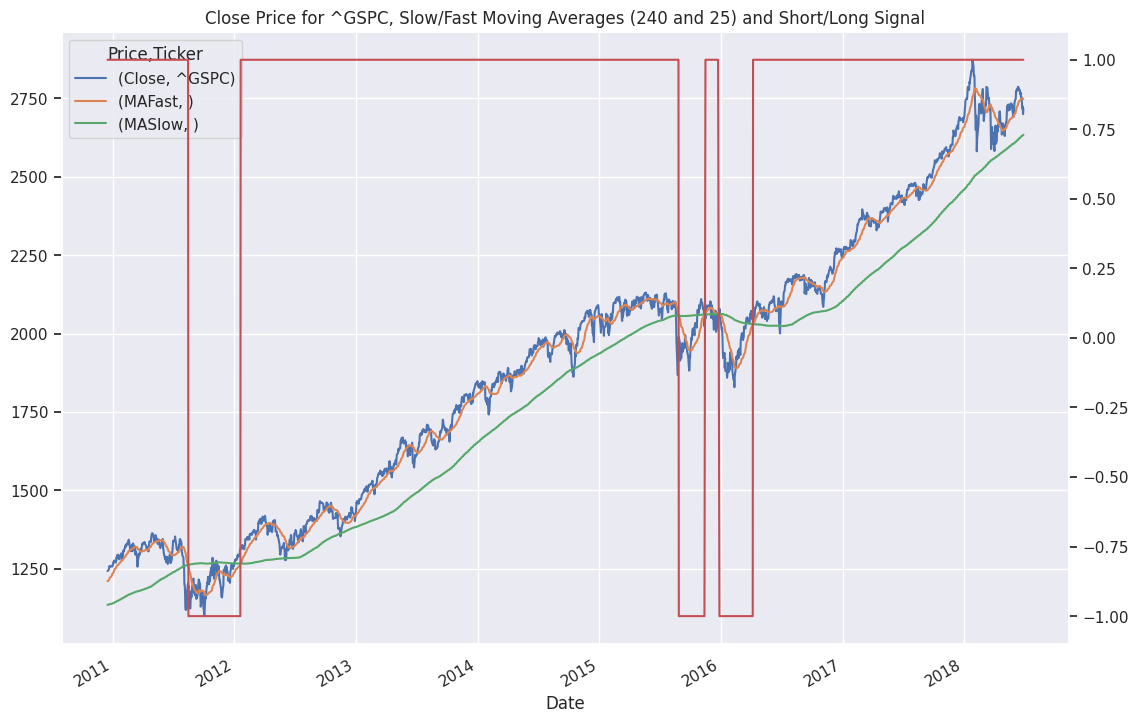

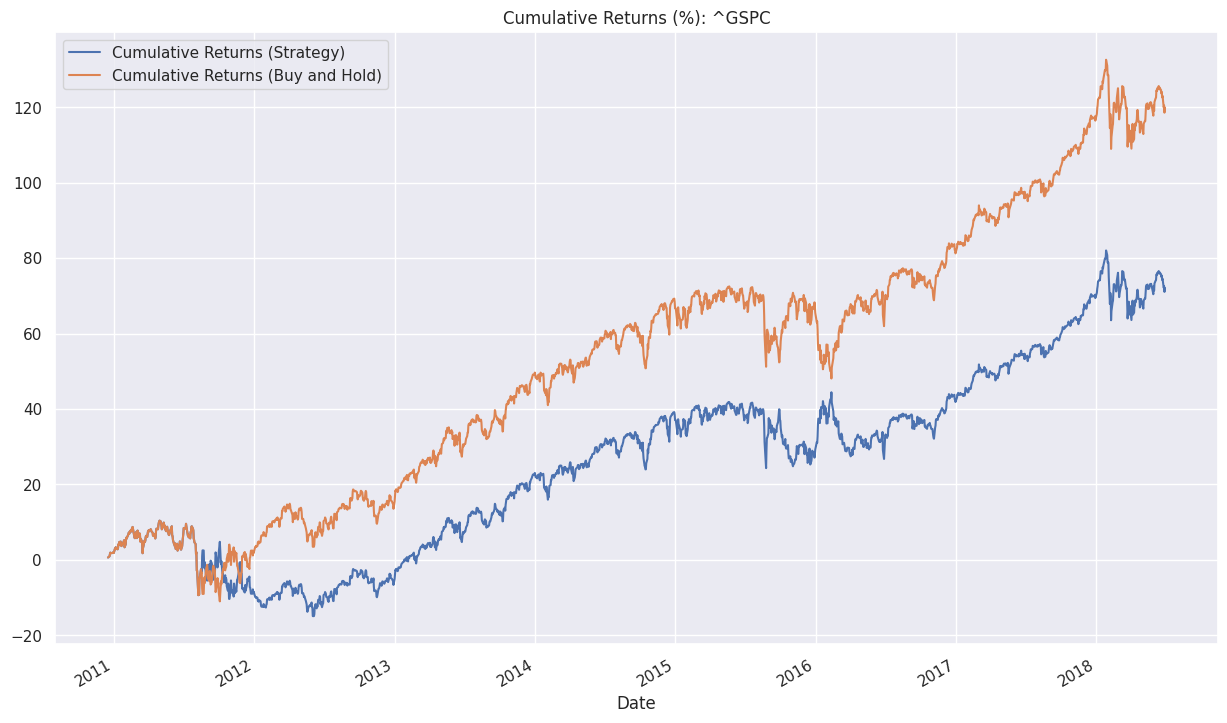



Total Returns: ^GSPC
Market Total Return: 119.903 %
Strategy Total Return: 72.097 %


Annualized Volatility: ^GSPC
Market Volatility: 0.14346 %
Strategy Volatility: 0.14354 %


In [83]:
stock =['^GSPC']
start = pd.to_datetime('2010-01-01')
end = pd.to_datetime('2018-06-29')

MAS = 240
MAF = 25

MA_Strategy(stock,start,end,MAF,MAS)

It appears the strategy does not outperform buy-and-hold even when we optimised hyperparameters for the index

Remember our moving average strategy is slightly outperformed by buy-and-hold for UNH stock. Can we do better by optimising hyperparameters?

In [84]:
sma1 = range(10, 90, 5)
sma2 = range(100, 250, 10)

stock = ['UNH']
start = pd.to_datetime('2010-01-01')
end = pd.to_datetime('2018-06-29')

show = pd.DataFrame()

for MAFast, MASlow in product(sma1, sma2):
  data = yf.download(stock, start=start, end=end)
  data.dropna(inplace=True)
  data['Log Returns'] = np.log(data['Close'] / data['Close'].shift(1))
  data.dropna(inplace=True)
  data['MASlow'] = data['Close'].rolling(MASlow).mean()
  data['MAFast'] = data['Close'].rolling(MAFast).mean()
  data.dropna(inplace=True)
  data['Signal'] = np.where(data['MAFast']>data['MASlow'],1,-1)
  data['Strategy Log Returns'] = data['Log Returns'] * (data['Signal'].shift(1))
  data.dropna(inplace=True)

  ret = (np.exp(data[['Log Returns', 'Strategy Log Returns']].sum()) -1)*100

  extension = pd.DataFrame(
      {'MA Slow': MASlow, 'MA Fast': MAFast,
       'Market Return (%)':  ((np.exp(data[['Log Returns', 'Strategy Log Returns']].sum()) -1)*100).iloc[0].round(3),
       'Strategy Return (%)':((np.exp(data[['Log Returns', 'Strategy Log Returns']].sum()) -1)*100).iloc[1].round(3),
       'Difference in Returns (%)': (ret['Strategy Log Returns'] - ret['Log Returns']).round(3)})
  show = pd.concat([show, extension], ignore_index=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [85]:
show.sort_values('Difference in Returns (%)', ascending=False).head(5)

,MA Slow,MA Fast,Market Return (%),Strategy Return (%),Difference in Returns (%)
148,230,55,631.808,536.555,-95.254
192,220,70,687.410,574.614,-112.796
118,230,45,631.808,510.689,-121.119
134,240,50,675.082,553.352,-121.730
207,220,75,687.410,551.545,-135.865


[*********************100%***********************]  1 of 1 completed


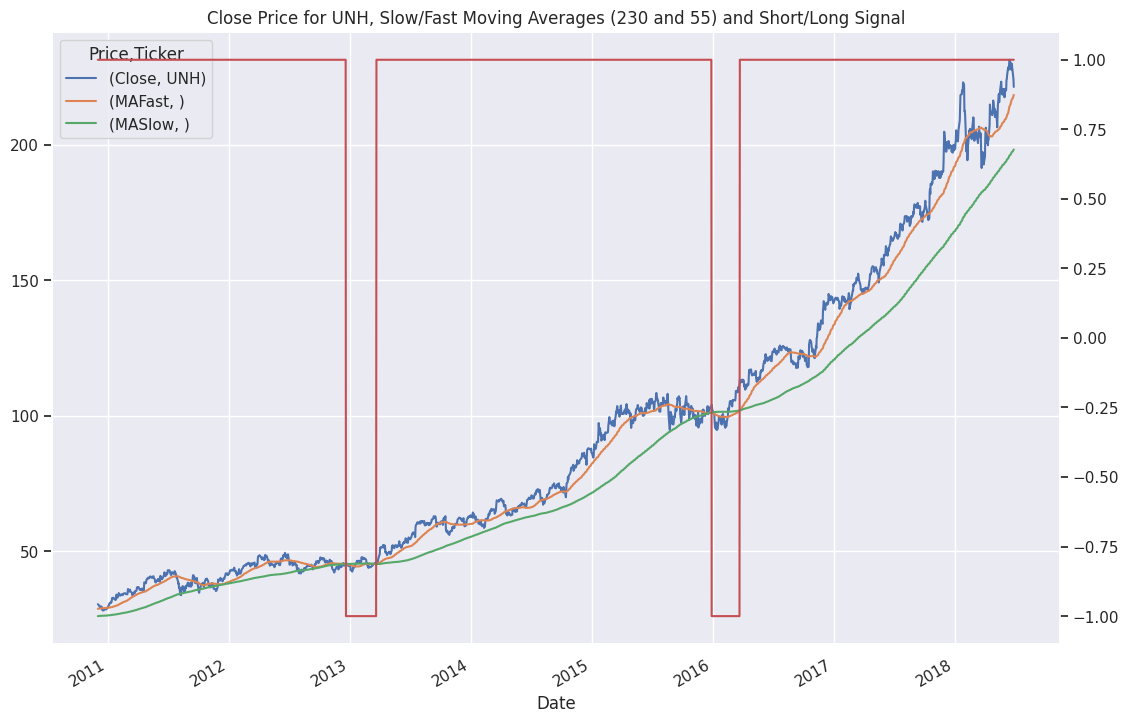

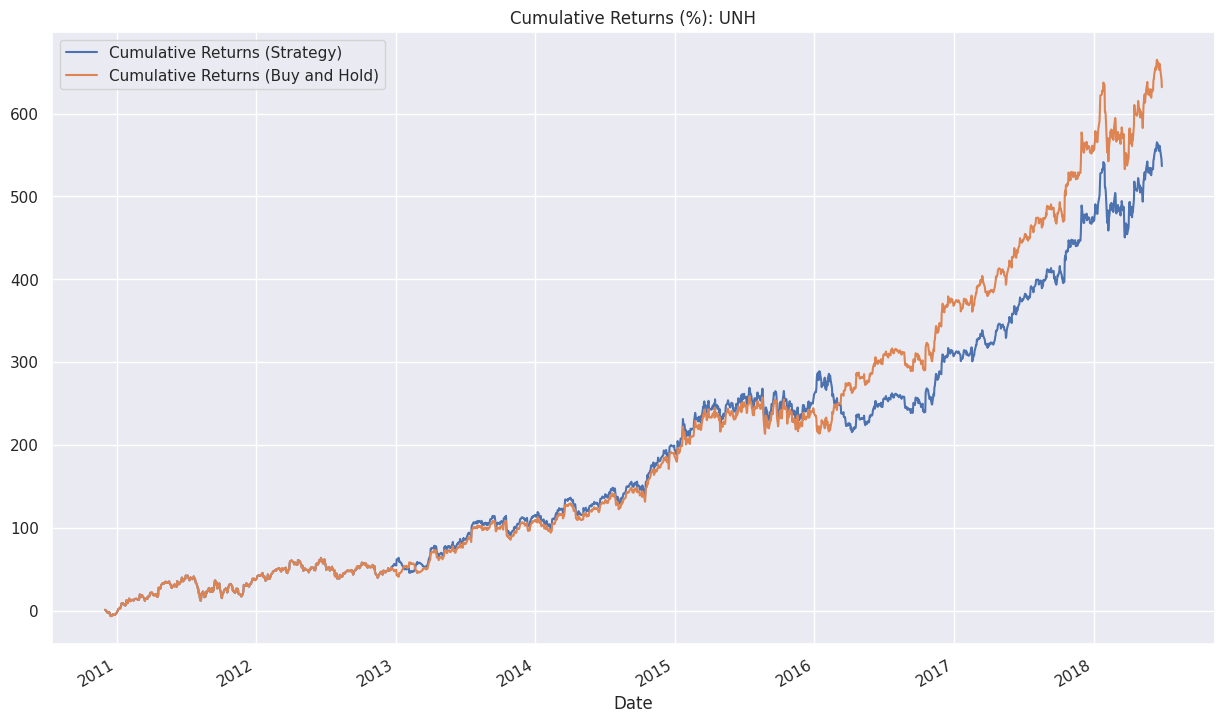



Total Returns: UNH
Market Total Return: 631.808 %
Strategy Total Return: 536.555 %


Annualized Volatility: UNH
Market Volatility: 0.22053 %
Strategy Volatility: 0.22061 %


In [86]:
stock =['UNH']
start = pd.to_datetime('2010-01-01')
end = pd.to_datetime('2018-06-29')
MAF = 55
MAS = 230

MA_Strategy(stock,start,end,MAF,MAS)


The moving average strategy is still outperformed by buy-and-hold for UNH stock.  However, the gap is smaller than before.